#HUMAN ACTIVITY DETECTION ASSIGNMENT
#### WE HAVE RAW DATA OF THE ACCELERATION AND GYROSCOPE DATA OF THE 30 PERSONS COLLECTED.

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 23.5MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1l1adJnTgeHULVuoLdTRyqi25-z6shBSL' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1l1adJnTgeHULVuoLdTRyqi25-z6shBSL


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('uploads')  


In [0]:
!mkdir traindata

In [0]:
import os 
os.getcwd() 
os.chdir('/content/traindata') 

In [4]:
!pwd

/content/traindata


#signals in the raw form provided to us based on the person behavior. the activities he can perform are 
* walking 
* walking upstairs
* walking downstairs
* sitting 
* standing
* laying
### IN THE ABOVE ACTIVITIES FIRST THREE ACTIVIVTIES ARE DYANMIC WHICH INVLOVES THE MOVEMENT OF THE PERSON WHERE AS THE LAST THREE ACTIVITIES ARE STATIC IN WHICH THE PERSONG DOES NOT MOVE.

#### BASED ON THE OBTAINED DATA WE  CAN PERFORM THE EXPLORATORY DATA ANALYSIS, DO THE FEATURE EXTRACTION AND WITH THE FEATURE ENGINEERING TECHNIQUES WE CAN OBTAIN THE BEST FEATURES BASEF ON THE DATA WE HAVE.
#### LATER WE CAN EMPLOY INTO THE MODELS AND OBTAIN THE BEST RESULTS BY CHOOSING THE BEST FEATURES AND BEST MODEL
#### WE CAN USE THE DEEP LEARNING MODELS LIKE LSTM IN WHICH WE CAN USE THE RAW DATA WE OBTAINED AND DIRECTLY EMPLOY INTO THE DEEPLEARNING MODELS.
#### WE CAN PERFORM THE HYPERPARAMETER TUNING ON THE MODELS AND OBTAIN THE BEST HYPERPARAMETER TO OBTAIN BEST RESULS IN TERMS OF HOW ACCURATE OUR MODEL IS.

In [5]:
!ls

body_acc_x_test.txt   body_gyro_x_train.txt  total_acc_y_test.txt
body_acc_x_train.txt  body_gyro_y_test.txt   total_acc_y_train.txt
body_acc_y_test.txt   body_gyro_y_train.txt  total_acc_z_test.txt
body_acc_y_train.txt  body_gyro_z_test.txt   total_acc_z_train.txt
body_acc_z_test.txt   body_gyro_z_train.txt  y_test.txt
body_acc_z_train.txt  total_acc_x_test.txt   y_train.txt
body_gyro_x_test.txt  total_acc_x_train.txt


In [0]:
import numpy as np

In [0]:
signals2=[
    "body_acc_x_test.txt",
    "body_acc_y_test.txt",
    "body_acc_z_test.txt",
    "body_gyro_x_test.txt",
    "body_gyro_y_test.txt",
    "body_gyro_z_test.txt",
    "total_acc_x_test.txt",
    "total_acc_y_test.txt",
    "total_acc_z_test.txt",
]

In [0]:
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [0]:
signals1=[
    "body_acc_x_train.txt",
    "body_acc_y_train.txt",
    "body_acc_z_train.txt",
    "body_gyro_x_train.txt",
    "body_gyro_y_train.txt",
    "body_gyro_z_train.txt",
    "total_acc_x_train.txt",
    "total_acc_y_train.txt",
    "total_acc_z_train.txt"
]

In [0]:
def read_csv(filename):
    return pd.read_csv(filename,delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in signals1:
        
        signals_data.append(read_csv(signal).as_matrix()) 

    
    return np.transpose(signals_data, (1, 2, 0))
def load_signals1(subset):
    signals_data = []

    for signal in signals2:
        
        signals_data.append(read_csv(signal).as_matrix()) 

    
    return np.transpose(signals_data, (1, 2, 0))

In [0]:
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}


#### get_dummies is atype of encoding .we are using to encode the output label for ex; if the label is zero it is represented as 100000 based on the size of the label.

In [0]:

def load_y(subset):
        
    y = read_csv("y_train.txt")[0]

    
    return pd.get_dummies(y).as_matrix()

def load_y1(subset):
    
    
    y = read_csv("y_test.txt")[0]

    return pd.get_dummies(y).as_matrix()

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train,X_test= load_signals('train'),load_signals1('test')
    y_train, y_test = load_y('train'), load_y1('test')

    return X_train, X_test, y_train, y_test

In [14]:
import  pandas as pd
X_train, X_test, Y_train, Y_test = load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [17]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


### we are using the lstm deeplearning model.

In [0]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [0]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [0]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [21]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [22]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [0]:
def errorplot(x,validationy,testy,ax):
  ax.plot(x,validationy,label='trainloss')
  ax.plot(x,testy,label='validationloss')
  plt.xlabel('number_of_epochs')
  plt.ylabel('categorical_cross_entropy')
  plt.legend()
  plt.show()

- Defining the Architecture of LSTM

### AS THE PART OF MODEL 1 WE ARE USING THE  LSTM LAYER WITH THE 32 HIDDEN LAYERS AT FIRST LSTM LAYER. LATER WE ARE USING THE DENSE LAYER WITH THE NUMBER OF OUTPUT ACTIVITIES WE HAVE. WE ARE USING THE DROPOUT INORDER TO REDUCE THE OVERFITTING OF OUR MODEL.SO THAT IF WE GIVE THE 0.5 AS THE DROPOUT VALUE THEN THE 50 PERCENT OF THE LSTM LAYER WILL BE TURNED OFF. 

In [23]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
# Training the model
history=model.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 92s 12ms/step - loss: 1.1821 - acc: 0.4849 - val_loss: 1.0799 - val_acc: 0.4812
Epoch 2/30
7352/7352 [==============================] - 92s 13ms/step - loss: 0.8964 - acc: 0.6049 - val_loss: 0.8318 - val_acc: 0.6328
Epoch 3/30
7352/7352 [==============================] - 91s 12ms/step - loss: 0.7430 - acc: 0.6514 - val_loss: 0.8144 - val_acc: 0.5904
Epoch 4/30
7352/7352 [==============================] - 90s 12ms/step - loss: 0.6915 - acc: 0.6616 - val_loss: 0.7841 - val_acc: 0.6179
Epoch 5/30
7352/7352 [==============================] - 92s 13ms/step - loss: 0.8822 - acc: 0.6315 - val_loss: 0.6848 - val_acc: 0.6301
Epoch 6/30
7352/7352 [==============================] - 90s 12ms/step - loss: 0.6310 - acc: 0.7087 - val_loss: 0.8325 - val_acc: 0.6926
Epoch 7/30
7352/7352 [==============================] - 91s 12ms/step - loss: 0.5917 - acc: 0.7489 - val_loss: 0.6560 - val_acc: 0.7296


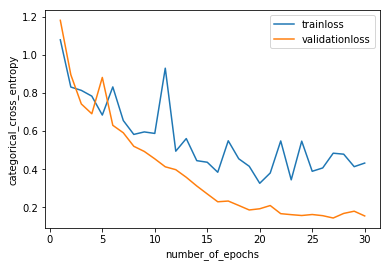

In [38]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
x=list(range(1,31))
validationy=history.history['val_loss']
testy=history.history['loss']
errorplot(x,validationy,testy,ax)

In [0]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [34]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0         0        0                   0   
SITTING                  0      347       126        0                   0   
STANDING                 0       47       484        1                   0   
WALKING                  0        0         0      479                  11   
WALKING_DOWNSTAIRS       0        0         0        0                 408   
WALKING_UPSTAIRS         0        0         2        6                   5   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            27  
SITTING                           18  
STANDING                           0  
WALKING                            6  
WALKING_DOWNSTAIRS                12  
WALKING_UPSTAIRS                 458  


In [35]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 6s 2ms/step


In [36]:
score

[0.43244978515694077, 0.9114353579911775]

##WE HAVE ACHIEVED 90 PERCENT ACCURACY WITH THE SINGLE LSTM LAYER AND 32 CELLS IN LAYER WITH OUT USIG ANY FEATURIASTIONS . WE TRIED TO MINIMISE THE CATEGORICAL CROSS ENTROPY. WE CAN ALO CHANGE AND TUNE THE VARIOUS HYPERPARAMETERS SO THAT WE CAN CONSTRUCT THE BETTER LSTM MODEL.

###model2 we gonna use the 3 lstm layers where the fiirst lstm layer consists of 64 hidden cells and 300 cells in second layer and 200 layers in the third layer.we also use the batch normalisation because we normalise the before entering into the lstm layer but after the data enters into the lstm layers due to performing the activation functions like sigmoid and relu the data may loose the behavior hence we use the batch normalisation so that we can make the data to maintain its behavior we also perform introducing the droput layer to prevent the overfitting in the data.

In [0]:
n_hidden = 64
from keras.layers.normalization import BatchNormalization

In [49]:

model1 = Sequential()
model1.add(LSTM(n_hidden, input_shape=(timesteps, input_dim),return_sequences=True))
model1.add(BatchNormalization())
model1.add(Dropout(0.6))
model1.add(LSTM(300,return_sequences=True))
model1.add(BatchNormalization())
model1.add(Dropout(0.4))
model1.add(LSTM(200))
model1.add(BatchNormalization())
model1.add(Dropout(0.6))
model1.add(Dense(n_classes, activation='sigmoid'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128, 64)           18944     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 64)           256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 64)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 128, 300)          438000    
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 300)          1200      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 300)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 200)               400800    
__________

In [0]:
# Compiling the model
model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [51]:
# Training the model
history=model1.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=14)

Train on 7352 samples, validate on 2947 samples
Epoch 1/14
7352/7352 [==============================] - 277s 38ms/step - loss: 0.8985 - acc: 0.6249 - val_loss: 0.8367 - val_acc: 0.6210
Epoch 2/14
7352/7352 [==============================] - 274s 37ms/step - loss: 0.7580 - acc: 0.6483 - val_loss: 0.7627 - val_acc: 0.6084
Epoch 3/14
7352/7352 [==============================] - 275s 37ms/step - loss: 0.7036 - acc: 0.6677 - val_loss: 0.6646 - val_acc: 0.6956
Epoch 4/14
7352/7352 [==============================] - 275s 37ms/step - loss: 0.5740 - acc: 0.7578 - val_loss: 1.2045 - val_acc: 0.7258
Epoch 5/14
7352/7352 [==============================] - 272s 37ms/step - loss: 0.3500 - acc: 0.8886 - val_loss: 0.3237 - val_acc: 0.8941
Epoch 6/14
7352/7352 [==============================] - 266s 36ms/step - loss: 0.2516 - acc: 0.9163 - val_loss: 0.4864 - val_acc: 0.8901
Epoch 7/14
7352/7352 [==============================] - 265s 36ms/step - loss: 0.2380 - acc: 0.9218 - val_loss: 0.5689 - val_acc: 

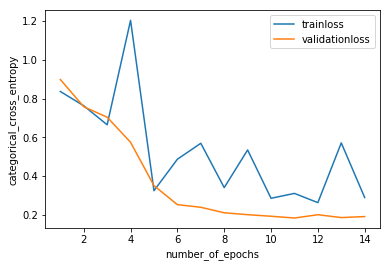

In [53]:
fig,ax=plt.subplots()
x=list(range(1,15))
validationy=history.history['val_loss']
testy=history.history['loss']
errorplot(x,validationy,testy,ax)

In [54]:
# Confusion Matrix
print(confusion_matrix(Y_test, model1.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  5      290       194        0                   0   
STANDING                 0       41       490        0                   0   
WALKING                  0        0         0      495                   1   
WALKING_DOWNSTAIRS       0        0         0        0                 420   
WALKING_UPSTAIRS         0        0         0       18                  14   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            2  
STANDING                           1  
WALKING                            0  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 439  


In [55]:
score = model1.evaluate(X_test, Y_test)

2947/2947 [==============================] - 17s 6ms/step


In [56]:
score

[0.2883422779202473, 0.9063454360366474]

### if we observe in the confusion matrix it i very clear that the model is confusing to predict the  difference between standing and sitting. because both the are static and may giving the similar signals as input. we have achieved 91 percent accuracy

###WE ARE RUNNING THE MODEL WITH 2 LSTM LAYERS WITH 32  CELLS IN THE HIDDEN LAYER WE ADD THE OUTPUT DENSE LAYER AND WE TAKE DENSEOUTPUT AT THE WITH SIGMOID AS THE ACTIVATION FUNCTION. WE USE 30 EPOCHS AND OBTAIN THE PERFORMANCE . THIS CASE WE ADDED THE DROPOUT LAYER BWE HAVE NOT DONE THE BATCHNORMALISATION. WE TAKE THE DROPOUT RATES OF 50 PERCENT AND ANOTHER DROPOUT LAYER OF 50 PERCENT WHICH MEANS 50 PERCENT OF THE HIDDEN CELLS WILL BE INACTIVE WHILE ADJUSTING THE WEIGHTS.

In [57]:
epochs=30
modelx = Sequential()
modelx.add(LSTM(32,return_sequences=True, input_shape=(timesteps, input_dim)))
modelx.add(Dropout(0.5))
modelx.add(LSTM(32))
modelx.add(Dropout(0.5))
modelx.add(Dense(n_classes, activation='sigmoid'))
print(modelx.summary())
modelx.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

history = modelx.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_8 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total params: 13,894
Trainable params: 13,894
Non-trainable params: 0
_________________________________________________________________
None
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 185s 25ms/step - loss: 1.2171

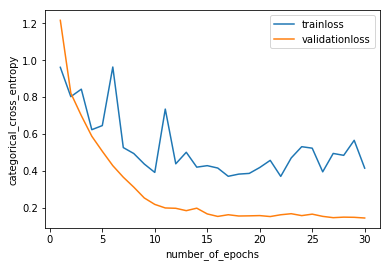

In [58]:
fig,ax=plt.subplots()
x=list(range(1,31))
validationy=history.history['val_loss']
testy=history.history['loss']
errorplot(x,validationy,testy,ax)

In [59]:

print(confusion_matrix(Y_test, modelx.predict(X_test)))


Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0         0        0                   0   
SITTING                  1      407        80        0                   1   
STANDING                 0      108       424        0                   0   
WALKING                  0        1         0      474                   9   
WALKING_DOWNSTAIRS       0        0         0        0                 413   
WALKING_UPSTAIRS         4        5         4       20                  13   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            27  
SITTING                            2  
STANDING                           0  
WALKING                           12  
WALKING_DOWNSTAIRS                 7  
WALKING_UPSTAIRS                 425  


In [60]:
score = modelx.evaluate(X_test, Y_test)

2947/2947 [==============================] - 12s 4ms/step


In [61]:
score

[0.4144287348136521, 0.9002375296912114]

##IN THIS MODEL WE HAVE INCREASED THE DROPOUT RATES TO 0.7 BECAUSE THE MODEL IS UNDERGOING OVERFITTING . IF WE OBSERVE THE TRAININGDATA ACCURACY IS NEARLY 0.95 AND 0.9

In [62]:
epochs=30
modelx = Sequential()
modelx.add(LSTM(32,return_sequences=True, input_shape=(timesteps, input_dim)))
modelx.add(Dropout(0.6))
modelx.add(LSTM(32))
modelx.add(Dropout(0.6))
modelx.add(Dense(n_classes, activation='sigmoid'))
print(modelx.summary())
modelx.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

history = modelx.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=26)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 128, 32)           5376      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128, 32)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 198       
Total params: 13,894
Trainable params: 13,894
Non-trainable params: 0
_________________________________________________________________
None
Train on 7352 samples, validate on 2947 samples
Epoch 1/26
7352/7352 [==============================] - 187s 25ms/step - loss: 1.2687

In [63]:
print(Y_test)

[[0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 ...
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]]


In [64]:
score = modelx.evaluate(X_test, Y_test)

2947/2947 [==============================] - 12s 4ms/step


In [65]:
score

[0.8857371849105553, 0.8775025449609772]

In [66]:

print(confusion_matrix(Y_test, modelx.predict(X_test)))


Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  5      420        50        0                   1   
STANDING                 0      127       405        0                   0   
WALKING                  0        0         3      422                  65   
WALKING_DOWNSTAIRS       0        0         0        0                 420   
WALKING_UPSTAIRS         0        0         0        2                  87   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                           15  
STANDING                           0  
WALKING                            6  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 382  


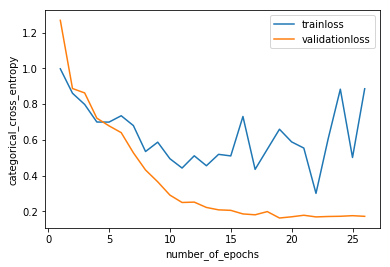

In [68]:
fig,ax=plt.subplots()
x=list(range(1,27))
validationy=history.history['val_loss']
testy=history.history['loss']
errorplot(x,validationy,testy,ax)

In [69]:

modelnew = Sequential()

modelnew.add(LSTM(64,return_sequences=True, input_shape=(timesteps, input_dim)))
modelnew.add(Dropout(0.7))
modelnew.add(LSTM(64))
modelnew.add(Dropout(0.7))
modelnew.add(Dense(n_classes, activation='sigmoid'))
print(modelnew.summary())
modelnew.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

history= modelnew.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 128, 64)           18944     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128, 64)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
Total params: 52,358
Trainable params: 52,358
Non-trainable params: 0
_________________________________________________________________
None
Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 192s 26ms/step - loss: 1.1373

In [70]:

print(confusion_matrix(Y_test, modelnew.predict(X_test)))


Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0        27        0                   0   
SITTING                  0      385       104        0                   0   
STANDING                 1       89       442        0                   0   
WALKING                  0        0         0      470                   0   
WALKING_DOWNSTAIRS       0        0         0        3                 412   
WALKING_UPSTAIRS         2        1         0       93                   2   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            2  
STANDING                           0  
WALKING                           26  
WALKING_DOWNSTAIRS                 5  
WALKING_UPSTAIRS                 373  


In [71]:
score = modelnew.evaluate(X_test, Y_test)

2947/2947 [==============================] - 12s 4ms/step


In [72]:
score

[0.7758174211089318, 0.8795385137427892]

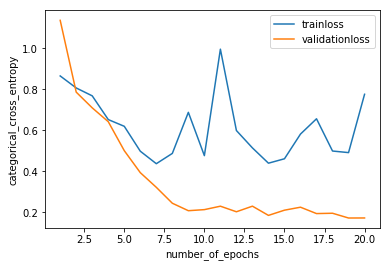

In [73]:
fig,ax=plt.subplots()
x=list(range(1,21))
validationy=history.history['val_loss']
testy=history.history['loss']
errorplot(x,validationy,testy,ax)

##TRAINING THE MODEL WITH MORE NUMBER OF HIDDEN CELLS IN A LAYER WITH HIGHER DROPUTS TO REDUCE THE CHANCES OF OVER FITTING WE HAVE ALSO DONE THE BACHNORMALISATION FOR THE LAYER.

In [74]:

modelnew = Sequential()

modelnew.add(LSTM(100,return_sequences=True, input_shape=(timesteps, input_dim)))
modelnew.add(Dropout(0.7))
modelnew.add(LSTM(300))
modelnew.add(Dropout(0.6))
modelnew.add(BatchNormalization())
modelnew.add(Dense(n_classes, activation='sigmoid'))
print(modelnew.summary())
modelnew.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

history= modelnew.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 128, 100)          44000     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128, 100)          0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 300)               481200    
_________________________________________________________________
dropout_15 (Dropout)         (None, 300)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 300)               1200      
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 1806      
Total params: 528,206
Trainable params: 527,606
Non-trainable params: 600
_________________________________________________________________
No

In [75]:
score=modelnew.evaluate(X_test, Y_test,verbose=0)
print('test score',score[0])
print('test accuracy',score[1])

test score 0.5799294071928931
test accuracy 0.8812351543942993


In [76]:

print(confusion_matrix(Y_test, modelnew.predict(X_test)))


Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  4      304       182        0                   0   
STANDING                 0       24       508        0                   0   
WALKING                  0        0         0      386                  68   
WALKING_DOWNSTAIRS       0        0         0        1                 419   
WALKING_UPSTAIRS         0        0         0        0                  28   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            1  
STANDING                           0  
WALKING                           42  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 443  


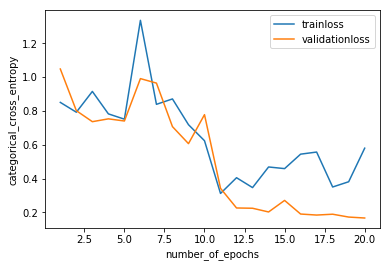

In [77]:
fig,ax=plt.subplots()
x=list(range(1,21))
validationy=history.history['val_loss']
testy=history.history['loss']
errorplot(x,validationy,testy,ax)

### CHANGING THE ACTIVATION FUNCTION TO SIGMOID SINCE THE SIGMOID GIVES THE OUTPUT PROBABILTIES THAT BELONGING TO THE PARTICULAR CLASS LABEL.WITH SAME CONGIGURATION OF PREVIOUS MODEL WE CHANGE THE ACTIVATION FUNCTION AND CHECK.

In [25]:

modelnew = Sequential()

modelnew.add(LSTM(100,return_sequences=True, input_shape=(timesteps, input_dim)))
modelnew.add(Dropout(0.7))
modelnew.add(LSTM(300))
modelnew.add(Dropout(0.6))
modelnew.add(BatchNormalization())

modelnew.add(Dense(n_classes, activation='softmax'))
print(modelnew.summary())
modelnew.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

history= modelnew.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=20)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 100)          44000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 300)               481200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)      

In [26]:
score=modelnew.evaluate(X_test, Y_test,verbose=0)
print('test score',score[0])
print('test accuracy',score[1])

test score 0.47755399492043493
test accuracy 0.9209365456396336


In [29]:

print(confusion_matrix(Y_test, modelnew.predict(X_test)))


Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  3      414        74        0                   0   
STANDING                 0       86       446        0                   0   
WALKING                  1        1         0      448                  44   
WALKING_DOWNSTAIRS       0        0         0        1                 419   
WALKING_UPSTAIRS         1        7         2        6                   5   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                            2  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 450  


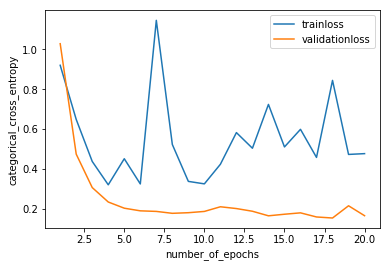

In [31]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
x=list(range(1,21))
validationy=history.history['val_loss']
testy=history.history['loss']
errorplot(x,validationy,testy,ax)

### USING THE SOFTMAX IN CASE OF SIGMOID ACTUALLY THE TEST ACCURACY REDUCED WITH SIGMOID WE GOT 0.91 WITH SOFTMAX WE GOT 0.892. WE WILL TRY WITH RELU ACTIVATION FUNCTION WITH THE SAME CONFIGUTRATION.

In [32]:

modela = Sequential()

modela.add(LSTM(100,return_sequences=True, input_shape=(timesteps, input_dim)))
modela.add(Dropout(0.7))
modela.add(LSTM(300))
modela.add(Dropout(0.6))
modela.add(BatchNormalization())
modela.add(Dense(n_classes, activation='relu'))
print(modela.summary())
modela.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

history= modela.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 100)          44000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 100)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 300)               481200    
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1806      
Total params: 528,206
Trainable params: 527,606
Non-trainable params: 600
_________________________________________________________________
No

In [33]:
score=modelnew.evaluate(X_test, Y_test,verbose=0)
print('test score',score[0])
print('test accuracy',score[1])

test score 0.47755399492043493
test accuracy 0.9209365456396336


In [34]:

print(confusion_matrix(Y_test, modelnew.predict(X_test)))


Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  3      414        74        0                   0   
STANDING                 0       86       446        0                   0   
WALKING                  1        1         0      448                  44   
WALKING_DOWNSTAIRS       0        0         0        1                 419   
WALKING_UPSTAIRS         1        7         2        6                   5   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                            2  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 450  


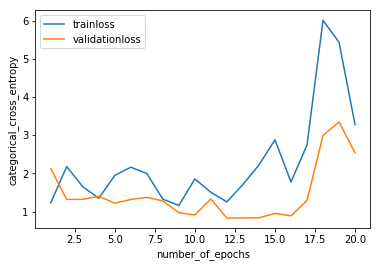

In [35]:

fig,ax=plt.subplots()
x=list(range(1,21))
validationy=history.history['val_loss']
testy=history.history['loss']
errorplot(x,validationy,testy,ax)

### WE ACHIEVED 91.6 TEST ACCURACY USING THE RELUAS THE ACTIVATION FUNCTION.
### WE GONNA USE THE SINGLE LSTM LAYER SIMPLE MODEL AND ADD DROPOUT OT THE LAYER.

In [36]:
model3 = Sequential()
# Configuring the parameters
model3.add(LSTM(64, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model3.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model3.add(Dense(n_classes, activation='sigmoid'))
print(model3.summary())

# Compiling the model
model3.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# Training the model
history= model3.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                18944     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 19,334
Trainable params: 19,334
Non-trainable params: 0
_________________________________________________________________
None
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 80s 11ms/step - loss: 1.2424 - acc: 0.4739 - val_loss: 1.0771 - val_acc: 0.5212
Epoch 2/30
7352/7352 [==============================] - 80s 11ms/step - loss: 0.9438 - acc: 0.5826 - val_loss: 0.8838 - val_acc: 0.6535
Epoch 3/30
7352/7352 [==============================] - 78s 11ms/step - loss:

In [37]:
scores3 = model3.evaluate(X_test, Y_test, verbose=0)
print("Test Score: %f" % (scores3[0]))
print("Test Accuracy: %f%%" % (scores3[1]*100))

Test Score: 0.559273
Test Accuracy: 88.937903%


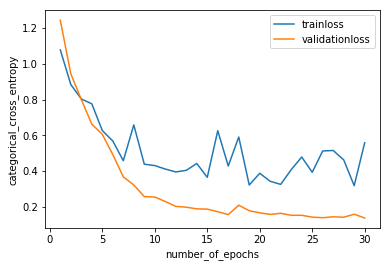

In [39]:
fig,ax=plt.subplots()
x=list(range(1,31))
validationy=history.history['val_loss']
testy=history.history['loss']
errorplot(x,validationy,testy,ax)

In [40]:
# Confusion Matrix
print(confusion_matrix(Y_test, model3.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0        24        0                   0   
SITTING                  0      388        97        2                   0   
STANDING                 0      101       421        4                   0   
WALKING                  0        0         0      464                  19   
WALKING_DOWNSTAIRS       0        0         0       22                 389   
WALKING_UPSTAIRS         0        0         0       19                   3   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             3  
SITTING                            4  
STANDING                           6  
WALKING                           13  
WALKING_DOWNSTAIRS                 9  
WALKING_UPSTAIRS                 449  


###SINGLE LSTM LAYER WITH MPORE NUMBER OF CELLS IN EACH HIDDEN LAYER

In [41]:
model3 = Sequential()
# Configuring the parameters
model3.add(LSTM(300, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model3.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model3.add(Dense(n_classes, activation='softmax'))
print(model3.summary())

# Compiling the model
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Training the model
history3 = model3.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 300)               372000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 1806      
Total params: 373,806
Trainable params: 373,806
Non-trainable params: 0
_________________________________________________________________
None
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 77s 10ms/step - loss: 1.3546 - acc: 0.4266 - val_loss: 1.4051 - val_acc: 0.3661
Epoch 2/30
7352/7352 [==============================] - 76s 10ms/step - loss: 1.3603 - acc: 0.3943 - val_loss: 1.2473 - val_acc: 0.4832
Epoch 3/30
7352/7352 [==============================] - 75s 10ms/step - los

In [42]:
scores3 = model3.evaluate(X_test, Y_test, verbose=0)
print("Test Score: %f" % (scores3[0]))
print("Test Accuracy: %f%%" % (scores3[1]*100))

Test Score: 0.405478
Test Accuracy: 90.091619%


In [43]:
# Confusion Matrix
print(confusion_matrix(Y_test, model3.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0         1        0                   0   
SITTING                  0      376       111        2                   0   
STANDING                 0       86       444        2                   0   
WALKING                  0        0         0      439                  45   
WALKING_DOWNSTAIRS       0        0         0        0                 420   
WALKING_UPSTAIRS         1        0         0        2                   2   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            26  
SITTING                            2  
STANDING                           0  
WALKING                           12  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 466  


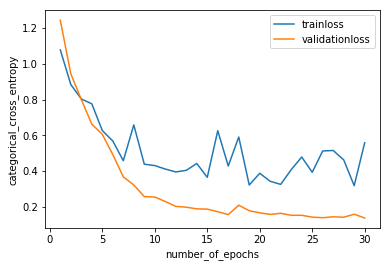

In [45]:
fig,ax=plt.subplots()
x=list(range(1,31))
validationy=history.history['val_loss']
testy=history.history['loss']
errorplot(x,validationy,testy,ax)

In [46]:
import pandas as pd
data=[[1,(32,6),'YES','YES',0.9,0.3,'SIGMOID'],[3,(64,300,200,6),'YES','YES',0.91,0.3,'SIGMOID'],[2,(32,32,6),'YES','NO',0.90,0.48,'SIGMOID'],[2,(64,64,6),'YES','NO',0.91,0.42,'SIGMOID'],[2,(100,300,6),'YES','YES',0.916,0.53,'SIGMOID'],[2,(100,300,6),'YES','YES',0.89,0.37,'SIGMOID'],[2,(100,300,6),'YES','YES',0.916,0.52,'SOFTMAX'],[1,(64,6),'YES','NO',0.9,0.49,'SIGMOID'],[1,(300,6),'YES','NO',0.91,0.3,'SOFTMAX']]
pd.DataFrame(data,columns=['NUMBER_OF_LAYERS_OF_LSTM','CONFIGURATION_OF_HIDDEN_CELLS','DROPOUT','BATCHNORMALISATION','ACCURACY','SCORE','ACTIVATION_FOR_DENSE_LAYER'])

,NUMBER_OF_LAYERS_OF_LSTM,CONFIGURATION_OF_HIDDEN_CELLS,DROPOUT,BATCHNORMALISATION,ACCURACY,SCORE,ACTIVATION_FOR_DENSE_LAYER
0,1,"(32, 6)",YES,YES,0.900,0.30,SIGMOID
1,3,"(64, 300, 200, 6)",YES,YES,0.910,0.30,SIGMOID
2,2,"(32, 32, 6)",YES,NO,0.900,0.48,SIGMOID
3,2,"(64, 64, 6)",YES,NO,0.910,0.42,SIGMOID
4,2,"(100, 300, 6)",YES,YES,0.916,0.53,SIGMOID
5,2,"(100, 300, 6)",YES,YES,0.890,0.37,SIGMOID
6,2,"(100, 300, 6)",YES,YES,0.916,0.52,SOFTMAX
7,1,"(64, 6)",YES,NO,0.900,0.49,SIGMOID
8,1,"(300, 6)",YES,NO,0.910,0.30,SOFTMAX


## CONCLUSION DOCUMENTATION AND KEYTAKEAWAYS 
### WE ARE PROVIDED WITHE DATA OF RAW SIGNALS AND THE CLASS LABEL IS MULTILABELLED.THE DATA IS OBTAINED FROM THE ACCELEROMETER AND GYROSCOPE SENSORS IN THE PHONE.GYROSCOPE IS USED TO MEASURE THE ANGULAR VELOCITYAND ACCELEROMETER USED TO MEASURE THE ACCELERATION WE WILL PREDICT WHAT THE PERSON IS PERFORMING.
### THE ACCELEROMETERS ARE TRIAXIAL ANDGYROSCOPE IS TRIAXIAL.GIVEN THE TIMESERIES DATA TO PREDICT THE ACTIVITY. WE HAVE BUILD MODELS USING THE LSTM LAYERS AND THE EXTRACTING THE FEATURES FROM THE GIVEN DATA.USING THE FEATURES WE HAVE USED THE MACHINE LEARNING MODELSAND USED MULTICLASSLOGLOSS AS THE METRIC.
##USING THE SIMPLE LSTM LAYERS WITH OUT ANY FEATURE EXTACTION AND FEATURE ENGINEERING WE ARE ABLE TO ACHIEVE THE ACCURACY OF  92 PERCENTAGE